<a href="https://colab.research.google.com/github/amritpal11singh/Abalone-classification-project/blob/main/Project_MC_classifier0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required libraries

In [ ]:
!pip install unicorn
!pip install python-multipart fastapi
!pip install pycaret pandas shap seaborn matplotlib


Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *


Getting dataset

In [ ]:
abalone_df = pd.read_excel('/content/drive/MyDrive/Datasets/Abalone_names_excel_2nd_way.xlsx')
abalone_df.head() # This function returns the first n rows for the object based on position.

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Looking into data

In [ ]:
abalone_df.info() # This tells us about range of entries, variables and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone_df.shape # shape of out put 4177X9

(4177, 9)

In [ ]:
print(abalone_df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

Data preprocessing and getting general statistics of data

In [ ]:
abalone_df.describe() # Tells about general statics of data mean std min max and rows X col. If min = 0 then there may be missing values

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
abalone_df.duplicated().sum() #indicating whether each row in the dataframe is duplicated or not.

0

In [ ]:
(abalone_df.Height ==0).sum() # This will tell total number of height entries with 0.
abalone_df[abalone_df['Height']==0] # It will show the complete entries with height 0.

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Calculating mean height for male, female and infants to replace the zero value.

In [ ]:
male_data = abalone_df[abalone_df['Sex'] == 'M']
infant_data = abalone_df[abalone_df['Sex'] == 'I']
female_data = abalone_df[abalone_df['Sex'] == 'F']

# Calculate the average height for each group
male_avg_height = male_data['Height'].mean()
infant_avg_height = infant_data['Height'].mean()
female_avg_height = female_data['Height'].mean()

# Print the results
print(f'Average height of males: {male_avg_height} mm')
print(f'Average height of kids: {infant_avg_height} mm')
print(f'Average height of females: {female_avg_height} mm')

Average height of males: 0.15138089005235603 mm
Average height of kids: 0.10799552906110284 mm
Average height of females: 0.15801071155317523 mm


Elliminating Height == 0 entries mean infants height.

In [ ]:
abalone_df['Height'] = abalone_df['Height'].replace(to_replace=0, value= infant_avg_height) # Replacing 0 height with mean value
(abalone_df.Height ==0).sum() # This will tell total number of height entries with 0 after correction.

0

Making predictor data types same (float) and transfering target variable M, F, and I to 0,1, and 2.

In [ ]:
abalone_df['Rings'] = abalone_df['Rings'].astype(np.float64)# Converting datatypes to float64
abalone_df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [ ]:
abalone_df['Sex'] = abalone_df['Sex'].map({"M":0,"F":1,"I":2})
abalone_df['Sex'].value_counts() # Counts for each sex types

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

In [ ]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


**Exploratory data analysis**

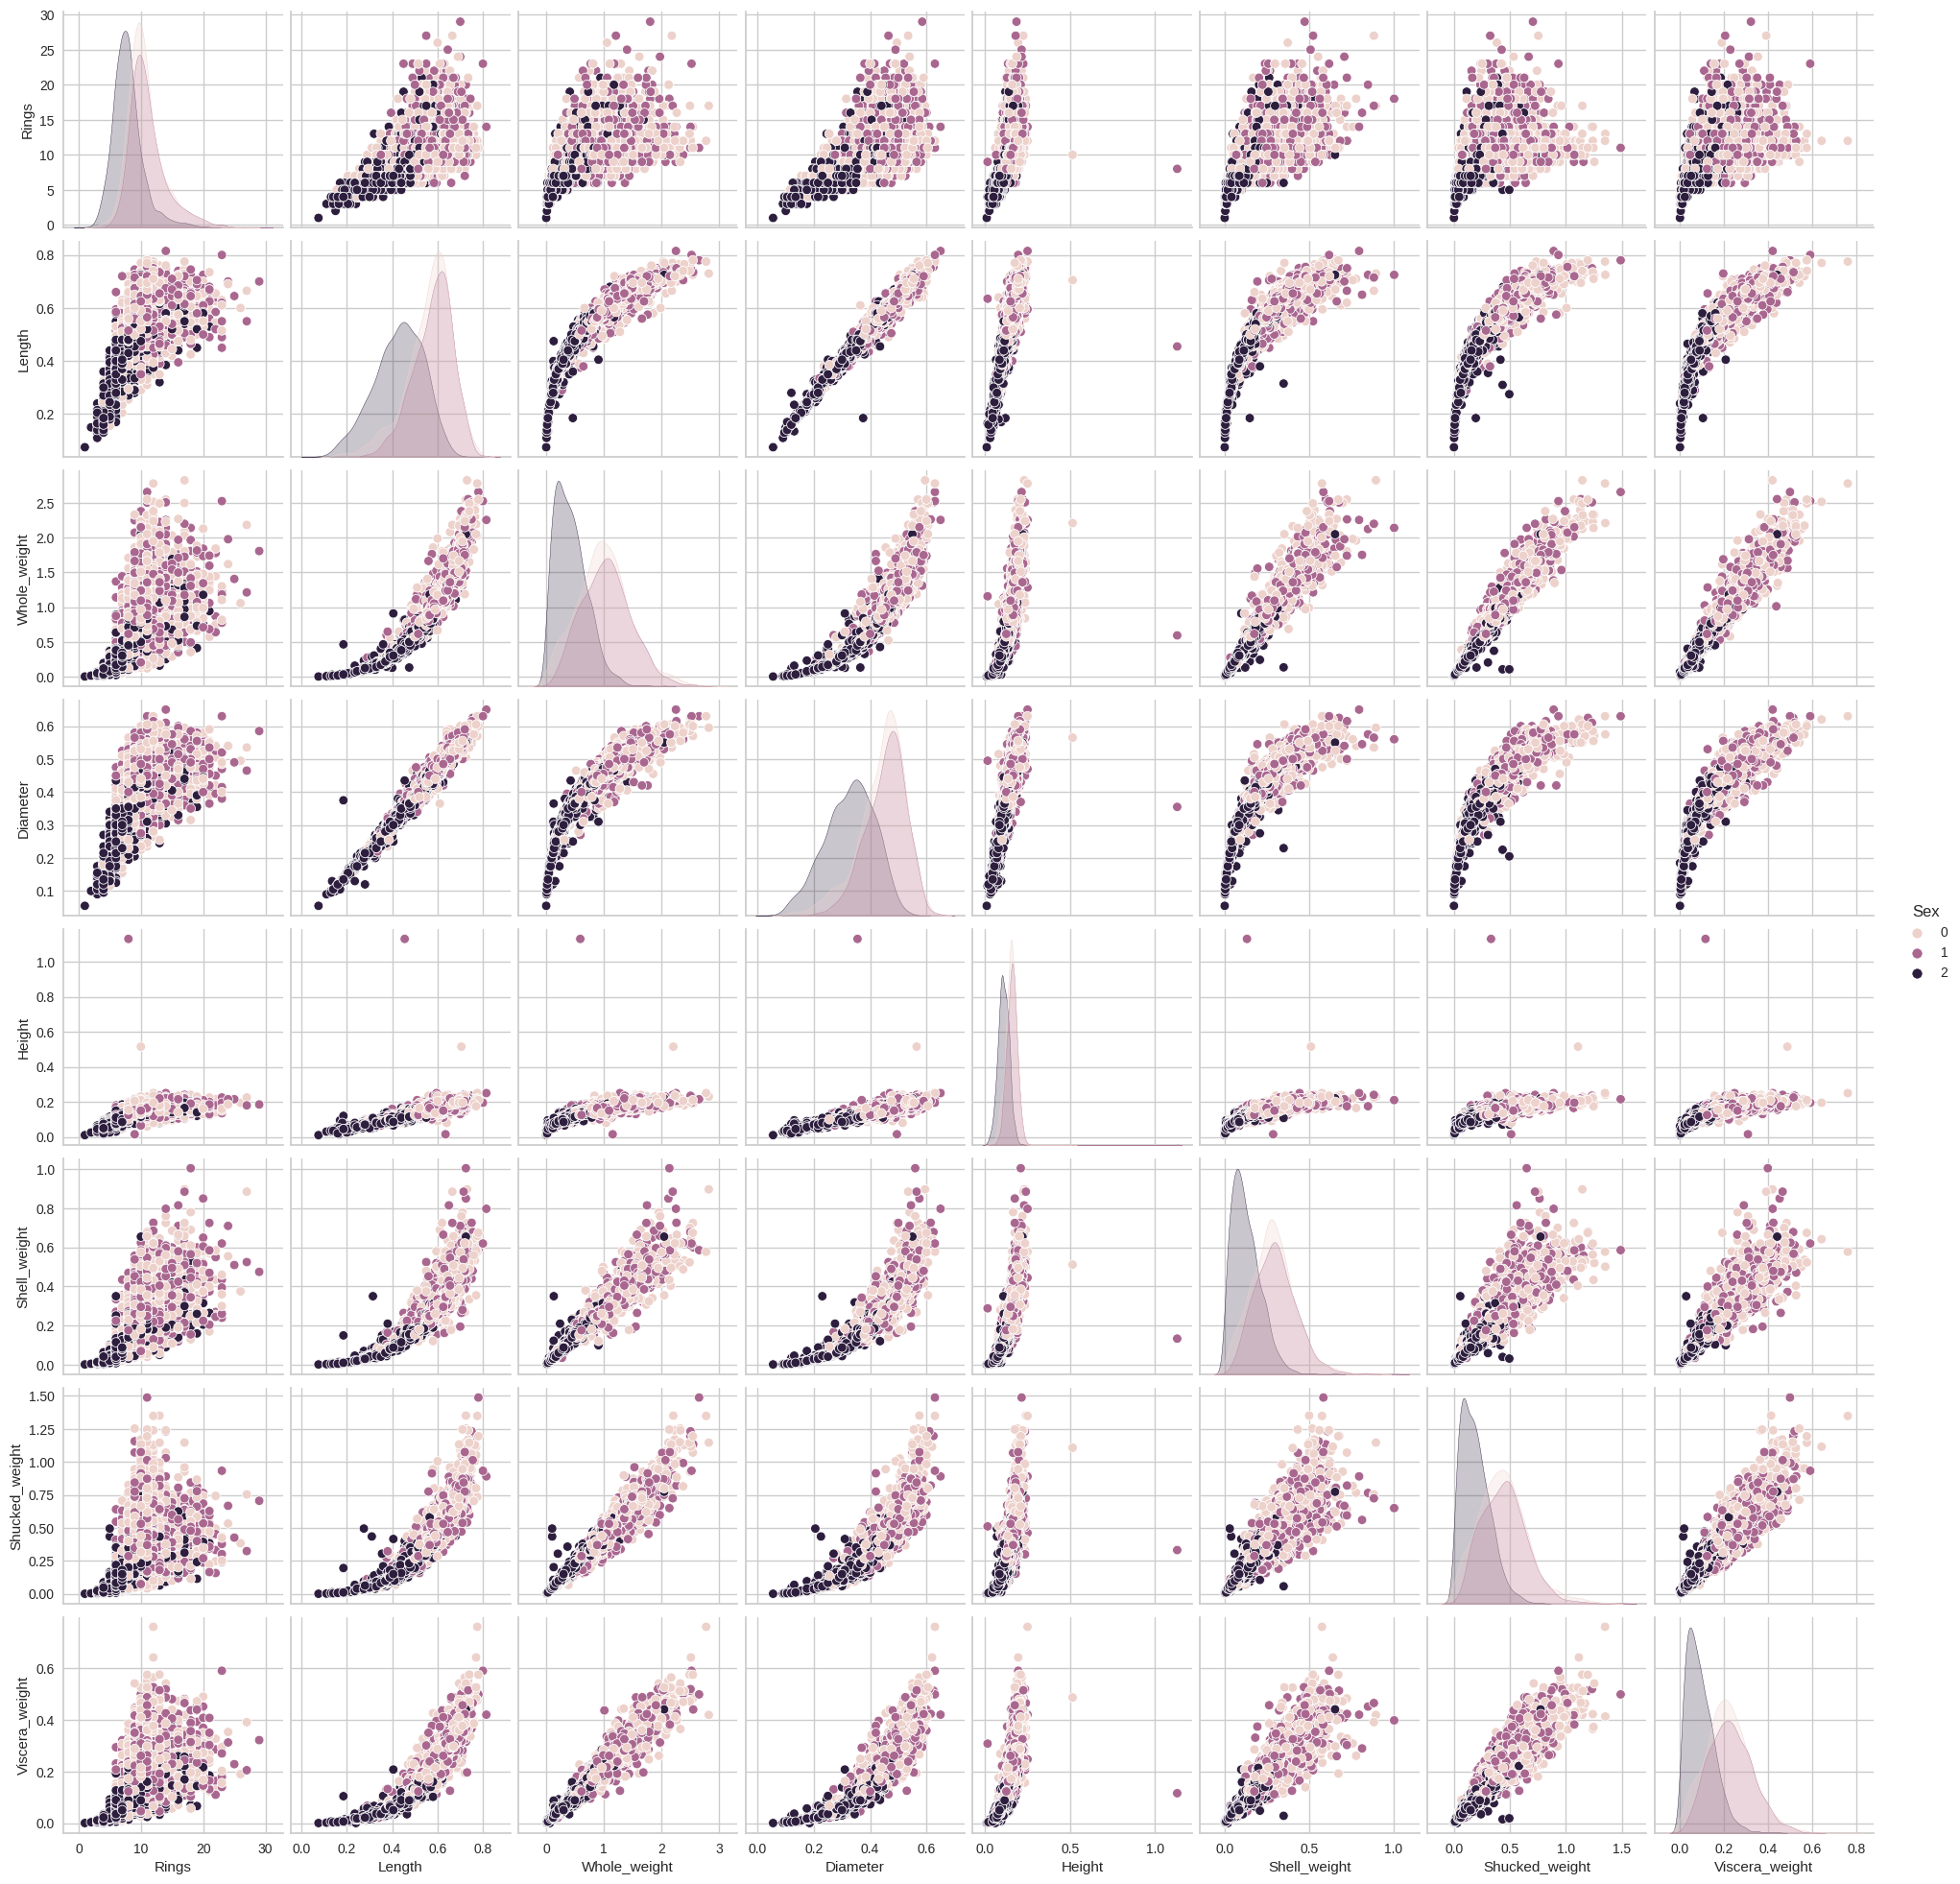

In [ ]:
sns.pairplot(abalone_df, vars = ['Rings', 'Length', 'Whole_weight','Diameter', 'Height', 'Shell_weight','Shucked_weight','Viscera_weight'], hue='Sex')

Plotting Histograms

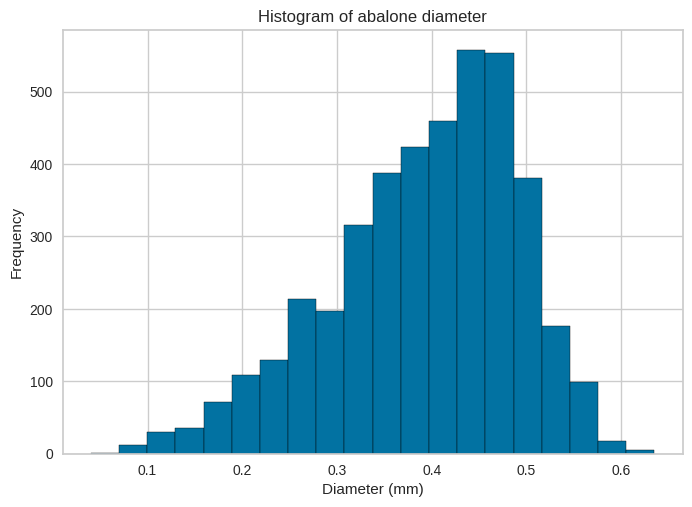

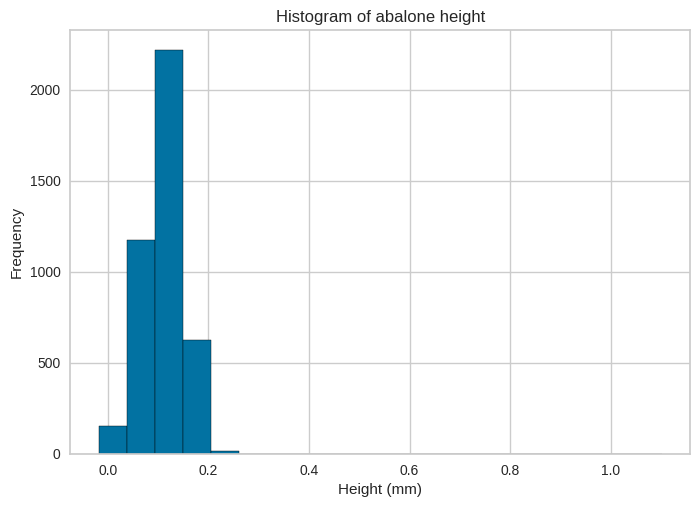

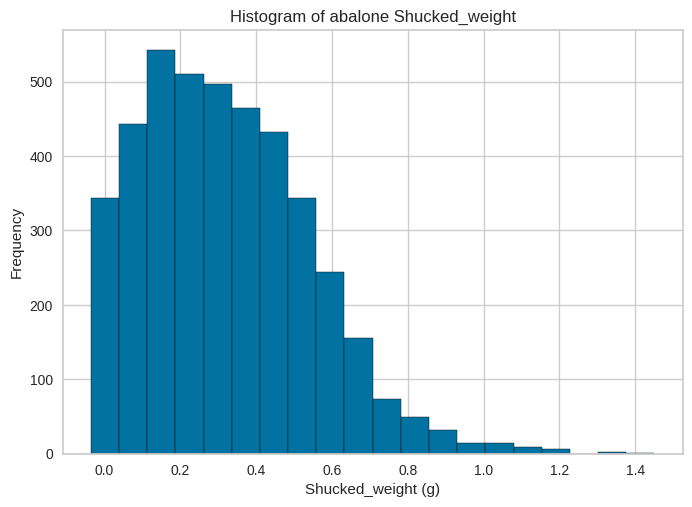

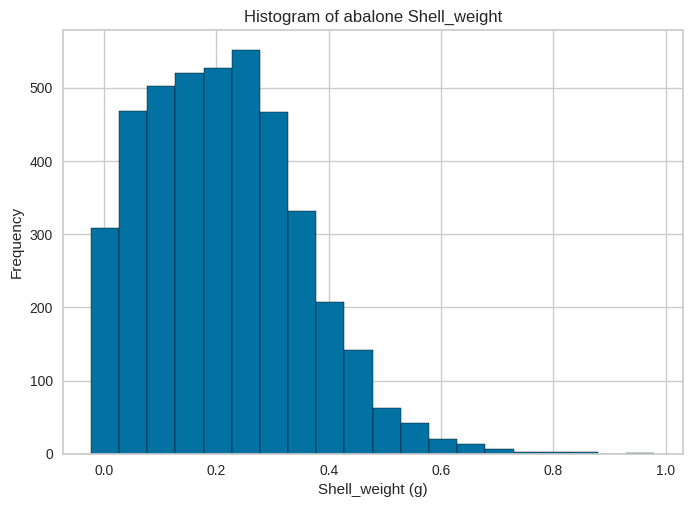

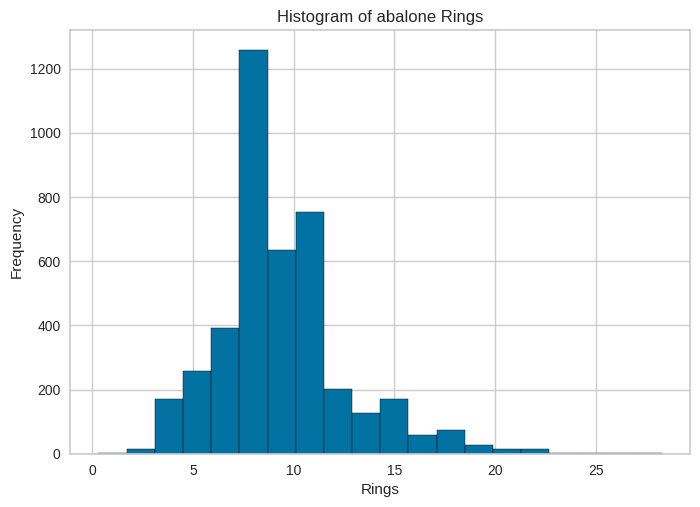

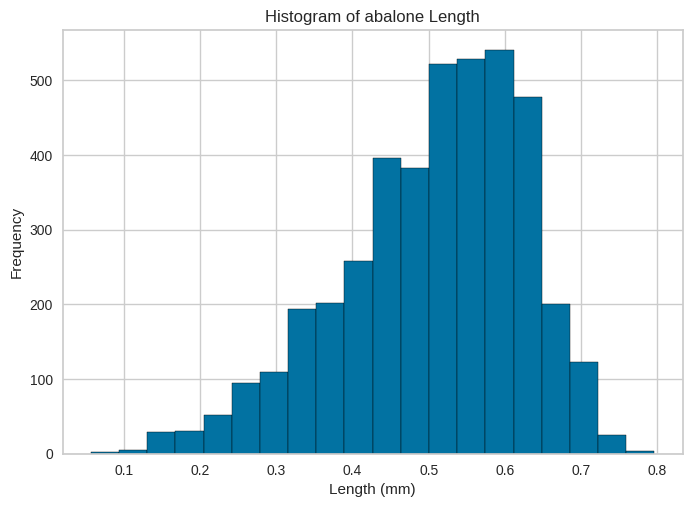

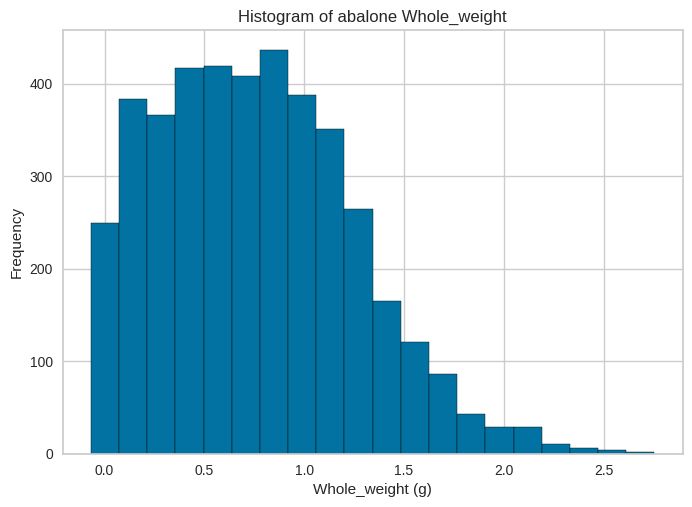

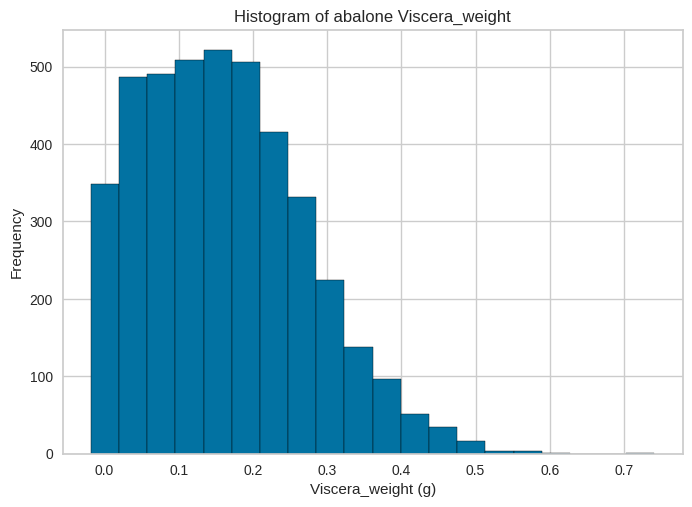

In [ ]:
plt.hist(abalone_df['Diameter'], bins=20, align='left', edgecolor='black')
plt.xlabel('Diameter (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone diameter')
plt.show()

plt.hist(abalone_df['Height'], bins=20, align='left', edgecolor='black')
plt.xlabel('Height (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone height')
plt.show()

plt.hist(abalone_df['Shucked_weight'], bins=20, align='left', edgecolor='black')
plt.xlabel('Shucked_weight (g)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone Shucked_weight')
plt.show()

plt.hist(abalone_df['Shell_weight'], bins=20, align='left', edgecolor='black')
plt.xlabel('Shell_weight (g)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone Shell_weight')
plt.show()

plt.hist(abalone_df['Rings'], bins=20, align='left', edgecolor='black')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.title('Histogram of abalone Rings')
plt.show()

plt.hist(abalone_df['Length'], bins=20, align='left', edgecolor='black')
plt.xlabel('Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone Length')
plt.show()

plt.hist(abalone_df['Whole_weight'], bins=20, align='left', edgecolor='black')
plt.xlabel('Whole_weight (g)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone Whole_weight')
plt.show()

plt.hist(abalone_df['Viscera_weight'], bins=20, align='left', edgecolor='black')
plt.xlabel('Viscera_weight (g)')
plt.ylabel('Frequency')
plt.title('Histogram of abalone Viscera_weight')
plt.show()

Co-relation matrix

<Axes: >

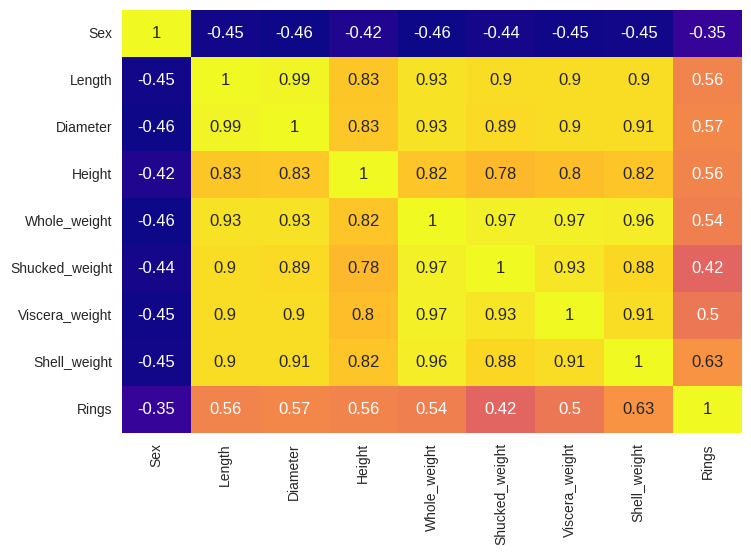

In [ ]:
corr_matrix = abalone_df.corr()
sns.heatmap(corr_matrix,annot=True,cbar=False,cmap='plasma')

Based on co-relation matrix, Choosing best co-relating predictor with target and dropping perfectly co-related predictors (with each other).

In [ ]:
abalone_df_optimal = abalone_df.loc[:, ['Sex', 'Diameter', 'Height','Shucked_weight','Shell_weight','Rings']]
print(abalone_df_optimal)

      Sex  Diameter  Height  Shucked_weight  Shell_weight  Rings
0       0     0.365   0.095          0.2245        0.1500   15.0
1       0     0.265   0.090          0.0995        0.0700    7.0
2       1     0.420   0.135          0.2565        0.2100    9.0
3       0     0.365   0.125          0.2155        0.1550   10.0
4       2     0.255   0.080          0.0895        0.0550    7.0
...   ...       ...     ...             ...           ...    ...
4172    1     0.450   0.165          0.3700        0.2490   11.0
4173    0     0.440   0.135          0.4390        0.2605   10.0
4174    0     0.475   0.205          0.5255        0.3080    9.0
4175    1     0.485   0.150          0.5310        0.2960   10.0
4176    0     0.555   0.195          0.9455        0.4950   12.0

[4177 rows x 6 columns]


Making box plots to see the distribution of predictor values based on target.

<Axes: xlabel='Sex', ylabel='Diameter'>

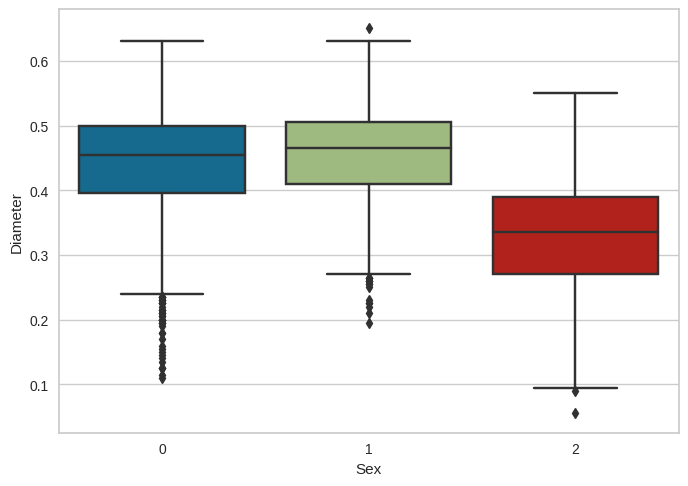

In [ ]:
sns.boxplot(x='Sex', y='Diameter', data=abalone_df_optimal)

<Axes: xlabel='Sex', ylabel='Height'>

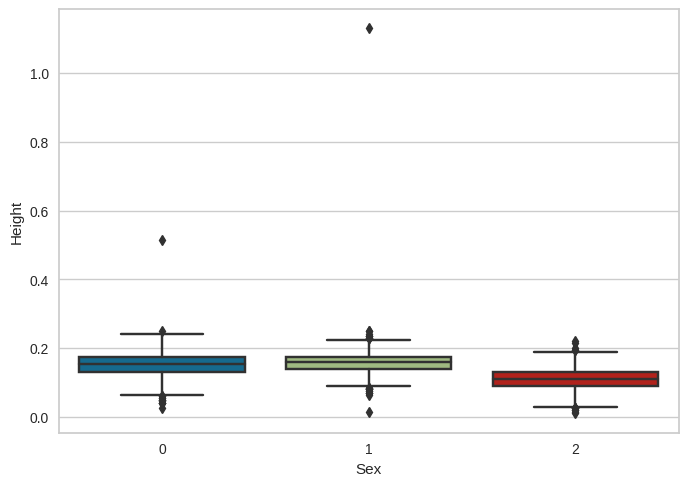

In [ ]:
sns.boxplot(x='Sex',y='Height',data=abalone_df_optimal)

<Axes: xlabel='Sex', ylabel='Shucked_weight'>

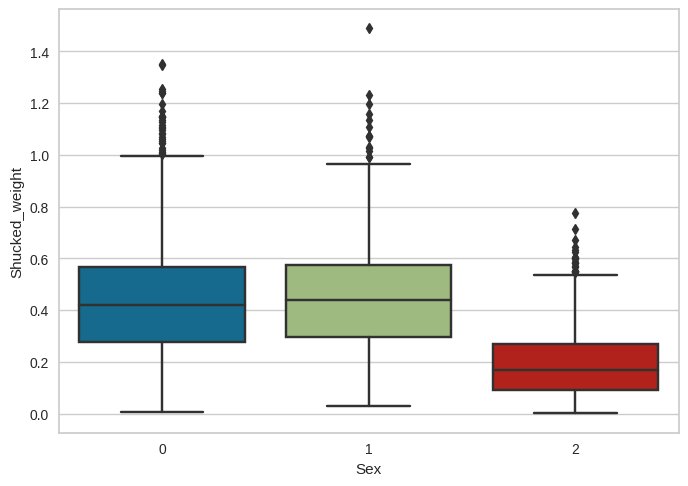

In [ ]:
sns.boxplot(x='Sex',y='Shucked_weight',data=abalone_df_optimal)

<Axes: xlabel='Sex', ylabel='Shell_weight'>

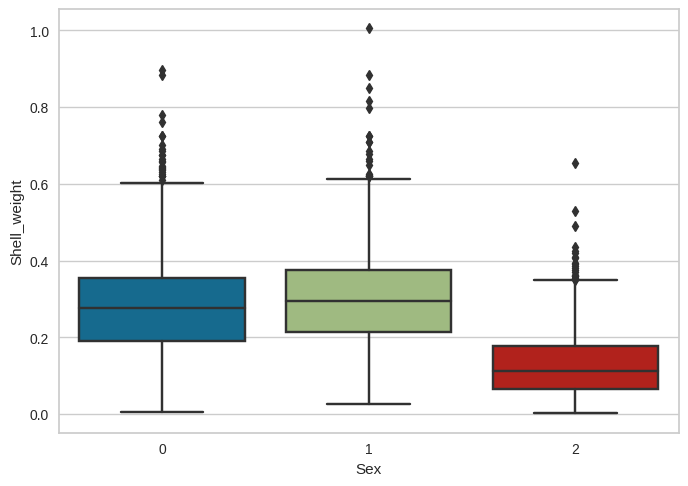

In [ ]:
sns.boxplot(x='Sex',y='Shell_weight',data=abalone_df_optimal)

<Axes: xlabel='Sex', ylabel='Rings'>

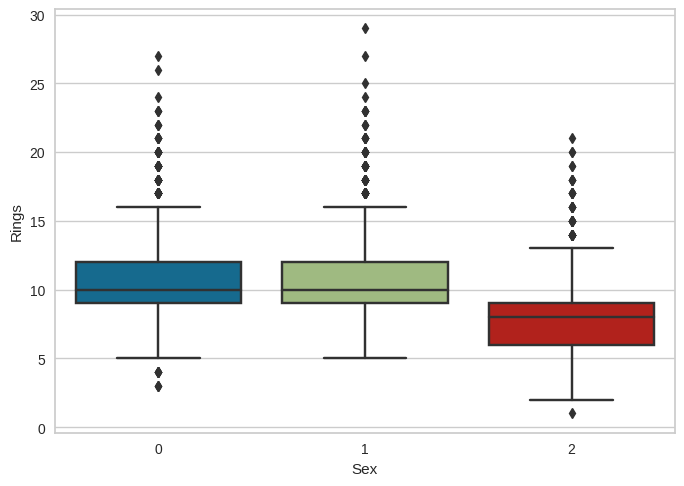

In [ ]:
sns.boxplot(x='Sex',y='Rings',data=abalone_df_optimal)

**Multiclass classification**
First of all setting up an experimet for target Sex

In [ ]:
experiment = setup(abalone_df_optimal, target='Sex') #The data is randomly shuffled to ensure that the order of the samples is random. A random sample of 80% of the data is taken from the shuffled data and assigned to the training set. The remaining 20% of the data is assigned to the validation set.


,Description,Value
0,Session id,2042
1,Target,Sex
2,Target type,Multiclass
3,Original data shape,"(4177, 6)"
4,Transformed data shape,"(4177, 6)"
5,Transformed train set shape,"(2923, 6)"
6,Transformed test set shape,"(1254, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


Here various models will be compared for their performance based on appropriate metrics.

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5576,0.7511,0.5576,0.5557,0.5397,0.3296,0.3389,0.6620
gbc,Gradient Boosting Classifier,0.5542,0.7520,0.5542,0.5458,0.5467,0.3283,0.3303,0.9310
ada,Ada Boost Classifier,0.5508,0.7260,0.5508,0.5421,0.5391,0.3234,0.3275,0.2190
ridge,Ridge Classifier,0.5467,0.0000,0.5467,0.5333,0.5267,0.3164,0.3236,0.0260
lda,Linear Discriminant Analysis,0.5464,0.7463,0.5464,0.5434,0.5363,0.3136,0.3187,0.0510
rf,Random Forest Classifier,0.5316,0.7282,0.5316,0.5251,0.5272,0.2952,0.2958,0.7380
qda,Quadratic Discriminant Analysis,0.5310,0.7392,0.5310,0.5224,0.4940,0.2918,0.3075,0.0470
nb,Naive Bayes,0.5306,0.7367,0.5306,0.5150,0.5155,0.2971,0.3013,0.0270
lightgbm,Light Gradient Boosting Machine,0.5282,0.7271,0.5282,0.5190,0.5222,0.2907,0.2915,1.6270
et,Extra Trees Classifier,0.5231,0.7186,0.5231,0.5168,0.5191,0.2826,0.2831,0.7310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
"""Test Model"""
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5311,0.7347,0.5311,0.5200,0.5114,0.2895,0.2970


,Diameter,Height,Shucked_weight,Shell_weight,Rings,Sex,prediction_label,prediction_score
96,0.435,0.150,0.2690,0.2500,9.0,0,2,0.3378
64,0.400,0.120,0.2340,0.1850,8.0,0,2,0.5003
1087,0.365,0.125,0.2135,0.1315,8.0,2,2,0.5666
2095,0.300,0.100,0.1545,0.0950,7.0,0,2,0.7120
2106,0.455,0.155,0.4160,0.3650,14.0,0,0,0.4780
...,...,...,...,...,...,...,...,...
2722,0.275,0.095,0.0950,0.0660,7.0,2,2,0.7814
3569,0.470,0.150,0.4440,0.2445,11.0,2,0,0.4721
2867,0.250,0.075,0.0750,0.0455,6.0,2,2,0.8443
2718,0.255,0.080,0.0780,0.0580,7.0,2,2,0.7985


In [ ]:
predict_model(best_model, abalone_df_optimal.tail()) #here prediction is on last five rows of data

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000


,Diameter,Height,Shucked_weight,Shell_weight,Rings,Sex,prediction_label,prediction_score
4172,0.450,0.165,0.3700,0.2490,11.0,1,0,0.4354
4173,0.440,0.135,0.4390,0.2605,10.0,0,0,0.4775
4174,0.475,0.205,0.5255,0.3080,9.0,0,0,0.4653
4175,0.485,0.150,0.5310,0.2960,10.0,1,0,0.4911
4176,0.555,0.195,0.9455,0.4950,12.0,0,0,0.5662


Saving model for future use. Saved model can be shared with others for use as well.

In [ ]:
"""Saving Model"""
save_model(best_model, model_name='rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Diameter', 'Height',
                                              'Shucked_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Tr...
                      

Making prediction

In [ ]:
"""Making perdiction. In future we deploy model and make prediction."""
model = load_model('rf_model')
model.predict(abalone_df_optimal.drop('Sex', axis=1).tail())

Transformation Pipeline and Model Successfully Loaded


array([0, 0, 0, 0, 0], dtype=int8)

**Binary classification as infant and not infant** Above code can be easily converted into a multiple binary classifications.
Modifications for a binary classification as an infant or not infant (Infants ==2 and non_infants == 0) are given as follows:

In [ ]:
abalone_df_optimal['Sex'] = abalone_df['Sex'].map({"M":0,"F":0,"I":2})
abalone_df_optimal['Sex'].value_counts() # Counts for each sex types

In [ ]:
experiment = setup(abalone_df_optimal, target='Sex')

In [ ]:
best_model_binary_infant = compare_models()

In [ ]:
predict_model(best_model_binary_infant)

Modifications for a binary classification as male and not male (Male == 0 Not male == 1)

In [ ]:
abalone_df['Sex'] = abalone_df['Sex'].map({"M":0,"F":1,"I":1})
abalone_df['Sex'].value_counts() # Counts for each sex types

In [ ]:
experiment = setup(abalone_df_optimal, target='Sex')

In [ ]:
best_model_binary_male = compare_models()

In [ ]:
predict_model(best_model_binary_male)

Modifications for binary classification as female and not female (Female == 1 Not female == 0)

In [ ]:
abalone_df['Sex'] = abalone_df['Sex'].map({"M":0,"F":1,"I":0})
abalone_df['Sex'].value_counts() # Counts for each sex types

In [ ]:
experiment = setup(abalone_df_optimal, target='Sex')

In [ ]:
best_model_binary_female = compare_models()

In [ ]:
predict_model(best_model_binary_female)